In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
donor_df = pd.read_csv('../data/raw/donations.csv')
donor_df.shape

(4687884, 3)

In [3]:
donor_df.head(2)

,id,created_at,amount
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.0
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.0


In [4]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687884 entries, 0 to 4687883
Data columns (total 3 columns):
id            object
created_at    object
amount        float64
dtypes: float64(1), object(2)
memory usage: 107.3+ MB


In [5]:
donor_df.created_at = pd.to_datetime(donor_df.created_at)
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687884 entries, 0 to 4687883
Data columns (total 3 columns):
id            object
created_at    datetime64[ns]
amount        float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 107.3+ MB


In [6]:
donor_df['year'] = donor_df.created_at.map(lambda x: x.year)
donor_df.head(2)

,id,created_at,amount,year
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.0,2013
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.0,2016


In [7]:
donor_df.year.value_counts()

2017    1190542
2016     957265
2015     783362
2014     746608
2013     573983
2018     435975
2012        149
Name: year, dtype: int64

In [8]:
donor_df['date'] = donor_df.created_at.dt.date

In [9]:
donor_df['month'] = donor_df.created_at.map(lambda x: x.month)

In [10]:
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 
              6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 
              11:'Nov', 12:'Dec'}


In [11]:
donations2017 = donor_df.query('year == 2017')

In [12]:
summary_2017 = donations2017.groupby('month')['amount'].agg(['count','mean']).reset_index()

In [13]:
summary_2017.columns = ['month', 'donation_count', 'average_donation']
summary_2017.month = summary_2017.month.replace(month_dict)
summary_2017

,month,donation_count,average_donation
0,Jan,95324,61.188116
1,Feb,94443,62.092240
2,Mar,115851,61.809301
3,Apr,54822,62.354161
4,May,59425,62.618421
5,Jun,56363,52.939171
6,Jul,95112,50.743368
7,Aug,169609,53.321241
8,Sep,120183,63.143887
9,Oct,114897,61.601824


In [16]:
yearly_data = pd.DataFrame(columns=['year', 'month', 'donation_count', 'average_donation'])

In [17]:
for year, df in donor_df.groupby('year'):
    summary = df.groupby('month')['amount'].agg(['count','mean']).reset_index()
    summary.columns = ['month', 'donation_count', 'average_donation']
    summary.month = summary.month.replace(month_dict)
    summary['year'] = year

    yearly_data = pd.concat([yearly_data, summary], sort=False)

In [18]:
yearly_data

,year,month,donation_count,average_donation
0,2012,Oct,74,49.175676
1,2012,Nov,8,39.375000
2,2012,Dec,67,311.770746
0,2013,Jan,22141,37.751697
1,2013,Feb,32268,46.600065
...,...,...,...,...
0,2018,Jan,116930,66.780766
1,2018,Feb,87280,58.368450
2,2018,Mar,95386,60.360870
3,2018,Apr,111018,56.871813


/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


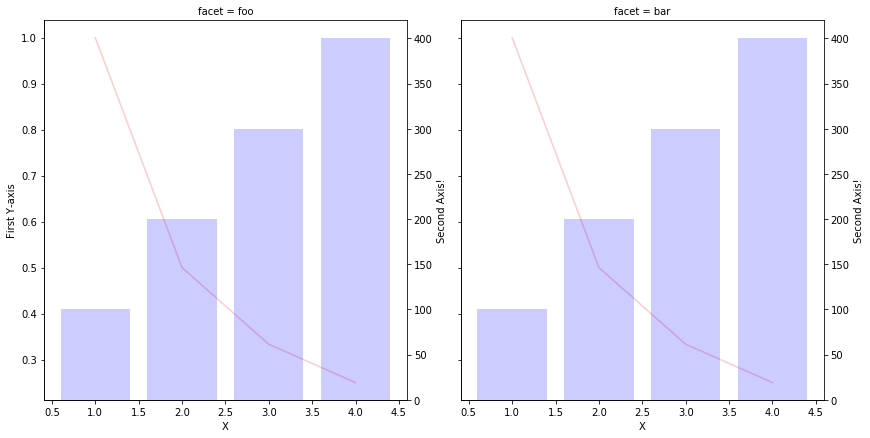

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def facetgrid_two_axes(*args, **kwargs):
    data = kwargs.pop('data')
    dual_axis = kwargs.pop('dual_axis')
    alpha = kwargs.pop('alpha', 0.2)
    kwargs.pop('color')
    ax = plt.gca()
    if dual_axis:
        ax2 = ax.twinx()
        ax2.set_ylabel('Second Axis!')

    ax.plot(data['x'],data['y1'], **kwargs, color='red',alpha=alpha)
    if dual_axis:
        ax2.bar(df['x'],df['y2'], **kwargs, color='blue',alpha=alpha)


df = pd.DataFrame()
df['x'] = np.arange(1,5,1)
df['y1'] = 1 / df['x']
df['y2'] = df['x'] * 100
df['facet'] = 'foo'
df2 = df.copy()
df2['facet'] = 'bar'

df3 = pd.concat([df,df2])
win_plot = sns.FacetGrid(df3, col='facet', size=6)
(win_plot.map_dataframe(facetgrid_two_axes, dual_axis=True)
         .set_axis_labels("X", "First Y-axis"))
plt.show()

/Users/ntistp30/.virtualenvs/kindful_donations-s6_uukWd/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


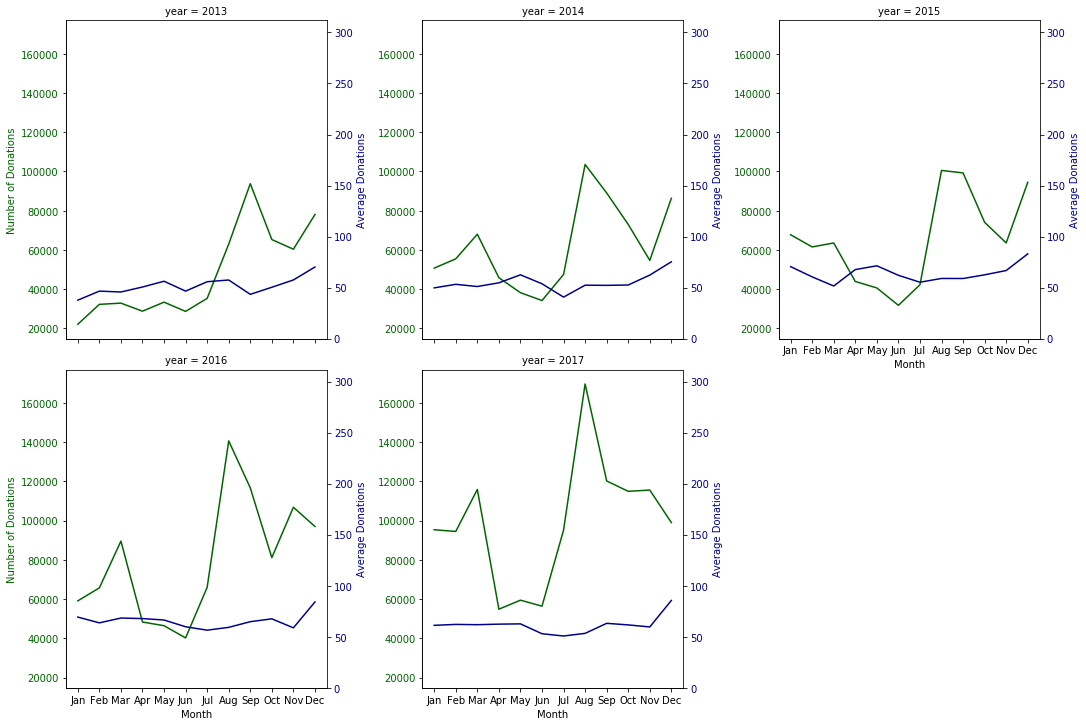

<Figure size 432x288 with 0 Axes>

In [45]:
def facetgrid_two_axes(*args, **kwargs):
    data = kwargs.pop('data')
    alpha = kwargs.pop('alpha', 0.2)
    kwargs.pop('color')
    ax = plt.gca()
    
    #ax1.set_xlabel('month')
    ax.set_ylabel('number of donations', color='darkgreen')
    ax.plot(data.month, data.donation_count, color='darkgreen')
    ax.set_xticklabels(data.month)

    ax.tick_params(axis='y', labelcolor='darkgreen')

    ax2 = ax.twinx()  

    ax2.set_ylabel('Average Donations', color='darkblue') 
    ax2.plot(data.month, data.average_donation, color='darkblue')
    ax2.tick_params(axis='y', labelcolor='darkblue')
    ax2.set_ylim(0, yearly_data.average_donation.max())
    
g = sns.FacetGrid(yearly_data[~yearly_data.year.isin([2012, 2018])], col="year", col_wrap=3, size=5)

(
    g.map_dataframe(facetgrid_two_axes, dual_axis=True)
         .set_axis_labels("Month", "Number of Donations")
)
plt.show()
plt.savefig('././monthly_donations_across_years.png');

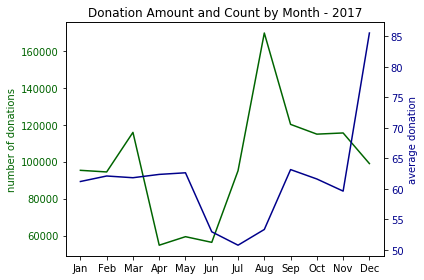

In [15]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2017.month, summary_2017.donation_count, color='darkgreen')
ax1.set_xticklabels(summary_2017.month)

ax1.tick_params(axis='y', labelcolor='darkgreen')

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2017.month, summary_2017.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2017')
fig.tight_layout();  

In [175]:
donations2018 = donor_df.query('year == 2018')
summary_2018 = donations2018.groupby('month')['amount'].agg(['count','mean']).reset_index()
summary_2018.columns = ['month', 'donation_count', 'average_donation']
summary_2018.month = summary_2018.month.replace(month_dict)

summary_2018

,month,donation_count,average_donation
0,Jan,116930,66.780766
1,Feb,87280,58.368450
2,Mar,95386,60.360870
3,Apr,111018,56.871813
4,May,25361,59.411944


In [177]:
extra_2018 = pd.DataFrame({'month':['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 
                                    'Nov', 'Dec']})
summary_2018 = summary_2018.append(extra_2018).reset_index()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [179]:
summary_2018 = summary_2018.drop(columns = 'index')
summary_2018

,average_donation,donation_count,month
0,66.780766,116930.0,Jan
1,58.368450,87280.0,Feb
2,60.360870,95386.0,Mar
3,56.871813,111018.0,Apr
4,59.411944,25361.0,May
5,NaN,NaN,Jun
6,NaN,NaN,Jul
7,NaN,NaN,Aug
8,NaN,NaN,Sep
9,NaN,NaN,Oct


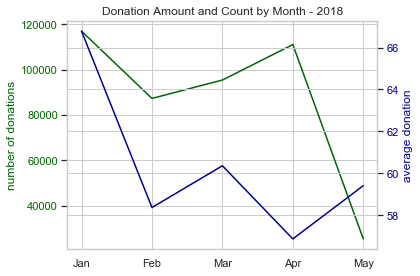

In [181]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2018.month, summary_2018.donation_count, color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2018.month, summary_2018.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2018')
fig.tight_layout(); 

In [157]:
donations2013 = donor_df.query('year == 2013')
summary_2013 = donations2013.groupby('month')['amount'].agg(['count','mean']).reset_index()
summary_2013.columns = ['month', 'donation_count', 'average_donation']
summary_2013.month = summary_2013.month.replace(month_dict)

summary_2013

,month,donation_count,average_donation
0,Jan,22141,37.751697
1,Feb,32268,46.600065
2,Mar,32892,45.759248
3,Apr,28792,50.632642
4,May,33390,56.285474
5,Jun,28686,46.600674
6,Jul,35328,55.803212
7,Aug,62967,57.493021
8,Sep,93778,43.449210
9,Oct,65304,50.379131


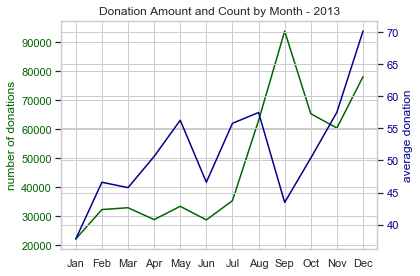

In [168]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2013.month, summary_2013.donation_count, color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2013.month, summary_2013.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2013')
fig.tight_layout(); 

In [159]:
donations2014 = donor_df.query('year == 2014')
summary_2014 = donations2014.groupby('month')['amount'].agg(['count','mean']).reset_index()
summary_2014.columns = ['month', 'donation_count', 'average_donation']
summary_2014.month = summary_2014.month.replace(month_dict)

summary_2014

,month,donation_count,average_donation
0,Jan,50732,49.785258
1,Feb,55472,53.262573
2,Mar,68004,51.107286
3,Apr,45856,54.730149
4,May,38218,62.579786
5,Jun,34222,53.793597
6,Jul,47501,40.729740
7,Aug,103559,52.420747
8,Sep,89033,52.245893
9,Oct,73007,52.592143


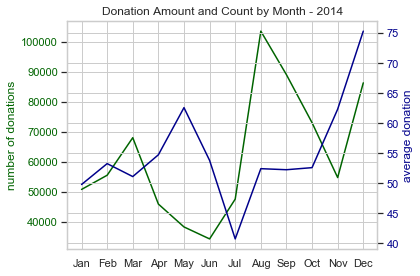

In [161]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2014.month, summary_2014.donation_count, color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2014.month, summary_2014.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2014')
fig.tight_layout(); 

In [162]:
donations2015 = donor_df.query('year == 2015')
summary_2015 = donations2015.groupby('month')['amount'].agg(['count','mean']).reset_index()
summary_2015.columns = ['month', 'donation_count', 'average_donation']
summary_2015.month = summary_2015.month.replace(month_dict)

summary_2015

,month,donation_count,average_donation
0,Jan,67746,70.579179
1,Feb,61536,60.568281
2,Mar,63558,51.609643
3,Apr,43934,67.694106
4,May,40637,71.419878
5,Jun,31774,62.105477
6,Jul,42271,55.322516
7,Aug,100536,59.013288
8,Sep,99249,58.956176
9,Oct,74078,62.576244


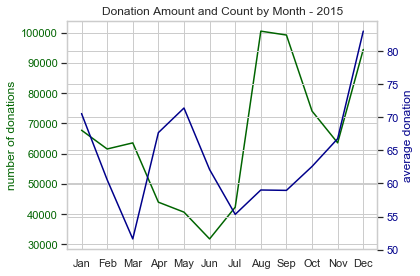

In [163]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2015.month, summary_2015.donation_count, color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2015.month, summary_2015.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2015')
fig.tight_layout(); 

In [164]:
donations2016 = donor_df.query('year == 2016')
summary_2016 = donations2016.groupby('month')['amount'].agg(['count','mean']).reset_index()
summary_2016.columns = ['month', 'donation_count', 'average_donation']
summary_2016.month = summary_2016.month.replace(month_dict)

summary_2016

,month,donation_count,average_donation
0,Jan,59069,69.264690
1,Feb,65706,63.615200
2,Mar,89520,68.325545
3,Apr,48296,67.799017
4,May,46409,66.413189
5,Jun,40176,59.784969
6,Jul,65972,56.449454
7,Aug,140603,59.217704
8,Sep,116665,64.742922
9,Oct,81104,67.548704


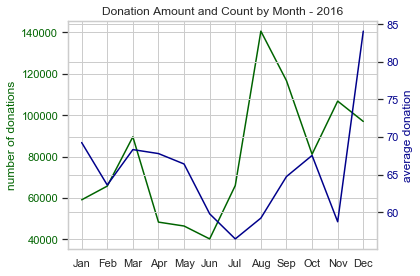

In [165]:
fig, ax1 = plt.subplots()

#ax1.set_xlabel('month')
ax1.set_ylabel('number of donations', color='darkgreen')
ax1.plot(summary_2016.month, summary_2016.donation_count, color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.set_xticklabels(month_labels)

ax2 = ax1.twinx()  

ax2.set_ylabel('average donation', color='darkblue') 
ax2.plot(summary_2016.month, summary_2016.average_donation, color='darkblue')
ax2.tick_params(axis='y', labelcolor='darkblue')
plt.title('Donation Amount and Count by Month - 2016')
fig.tight_layout(); 

In [199]:
donations2018 = donor_df.query('year == 2018')
donations2017 = donor_df.query('year == 2017')
donations2016 = donor_df.query('year == 2016')
donations2015 = donor_df.query('year == 2015')
donations2014 = donor_df.query('year == 2014')
donations2013 = donor_df.query('year == 2013')

### [`Giving Tuesday`](https://en.wikipedia.org/wiki/Giving_Tuesday) first came about in October 2012


In [10]:
giving_tuesdays = {2012:'2012-11-27', 2013:'2013-12-03', 2014:'2014-12-02',
                  2015:'2015-12-01', 2016:'2016-11-29', 2017:'2017-11-28',
                  2018:'2018-11-27'}

### 2017

In [201]:
giving_day_2017 = donations2017.loc[donations2017.date.astype(str) == '2017-11-28']
giving_day_2017.shape

(33989, 6)

In [244]:
print('The average donation in 2017 was $', round(donations2017.amount.mean()))
print('The average donation in 2017 on the day of giving was $', round(giving_day_2017.amount.mean()))

The average donation in 2017 was $ 61
The average donation in 2017 on the day of giving was $ 38


In [248]:
print('The average number of donations on a day in 2017 was', round(grouped2017['count'].mean()))
print('The number of donations on the day of giving in 2017 was', giving_day_2017.shape[0])

The average number of donations on a day in 2017 was 3262
The number of donations on the day of giving in 2017 was 33989


In [226]:
grouped2017 = donations2017.groupby('date')['amount'].agg(['mean', 'count']).reset_index()
most_donation_days_2017 = grouped2017.sort_values('count', ascending = False).head(5)

In [227]:
highest_avg_donation_days_2017 = grouped2017.sort_values('mean', ascending = False).head(5)

In [228]:
print(most_donation_days_2017.head(2))
print(highest_avg_donation_days_2017.head(2))

           date       mean  count
331  2017-11-28  37.522097  33989
87   2017-03-29  68.446919  31152
           date        mean  count
364  2017-12-31  135.793578   6039
362  2017-12-29  117.364795   4240


### 2016

In [238]:
donations2016.amount.mean()

65.44920292708946

In [239]:
giving_day_2016 = donations2016.loc[donations2016.date.astype(str) == '2016-11-29']
giving_day_2016.shape

(30834, 6)

In [240]:
giving_day_2016.amount.mean()

44.64098560031141

### 2018

In [232]:
donations2018.amount.mean()

60.74017198233782

In [233]:
giving_day_2018 = donations2018.loc[donations2018.date.astype(str) == '2018-11-27']
giving_day_2018.shape

(0, 6)

In [237]:
donations2018.date.max()

datetime.date(2018, 5, 9)

In [234]:
grouped2018 = donations2018.groupby('date')['amount'].agg(['mean', 'count']).reset_index()
most_donation_days_2018 = grouped2018.sort_values('count', ascending = False).head(5)

In [235]:
highest_avg_donation_days_2018 = grouped2018.sort_values('mean', ascending = False).head(5)

In [236]:
print(most_donation_days_2018.head(2))
print(highest_avg_donation_days_2018.head(2))

          date       mean  count
24  2018-01-25  71.670685  33980
25  2018-01-26  64.244622   6478
          date        mean  count
59  2018-03-01  102.225676   3122
3   2018-01-04   91.152150   2084


In [250]:
top_10_donor_list = list(donor_df.id.value_counts().head(10).index)

In [251]:
top_10_df = donor_df.loc[donor_df.id.isin(top_10_donor_list)]
top_10_df.shape

(86158, 6)

In [252]:
top_10_df.head(2)

,id,created_at,amount,year,date,month
474309,19f24640d9da49f6f8b4c9938c049591,2014-02-11 22:18:20,20.0,2014,2014-02-11,2
474310,19f24640d9da49f6f8b4c9938c049591,2014-02-13 23:20:20,10.0,2014,2014-02-13,2


In [253]:
top_10_totals = top_10_df.groupby(['id', 'year'])['amount'].agg('sum').reset_index()
top_10_totals.head()

,id,year,amount
0,19f24640d9da49f6f8b4c9938c049591,2014,3318.23
1,19f24640d9da49f6f8b4c9938c049591,2015,6779.89
2,19f24640d9da49f6f8b4c9938c049591,2016,8471.19
3,19f24640d9da49f6f8b4c9938c049591,2017,11397.95
4,19f24640d9da49f6f8b4c9938c049591,2018,3420.42


In [254]:
donor_list = ['donor_1', 'donor_2', 'donor_3', 'donor_4',
                    'donor_5', 'donor_6', 'donor_7', 'donor_8',
                    'donor_9', 'donor_10']

In [255]:
#top_25_totals['alias'] = ''
alias_dict = {}
for idx, donor_id in enumerate(set(top_10_totals.id)):
    alias_dict[donor_id] = donor_list[idx]
    
    
alias_dict   

{'19f24640d9da49f6f8b4c9938c049591': 'donor_9',
 '237db43817f34988f9d543ca518be4ee': 'donor_1',
 '24ecca49933c30a0beb83090591720c0': 'donor_8',
 '39df9399f5384334a42905bcf0acdcbf': 'donor_3',
 '6a35a7514005c04f8520e5d8f7657d91': 'donor_2',
 '6f74ffb17cbb2b616b1eef06bd4acd0c': 'donor_10',
 '74f7db06bcd9557d1e992dc029db69cc': 'donor_7',
 'a0e1d358aa17745ff3d3f4e4909356f3': 'donor_4',
 'a1929a1172ad0b3d14bc84f54018c563': 'donor_6',
 'b51c76411b51751f45527c63c69ead9e': 'donor_5'}

In [257]:
top_10_totals['alias'] = top_10_totals.id.map(alias_dict)

In [258]:
top_10_totals['donor'] = top_10_totals.alias + '-' + top_10_totals.year.astype(str)

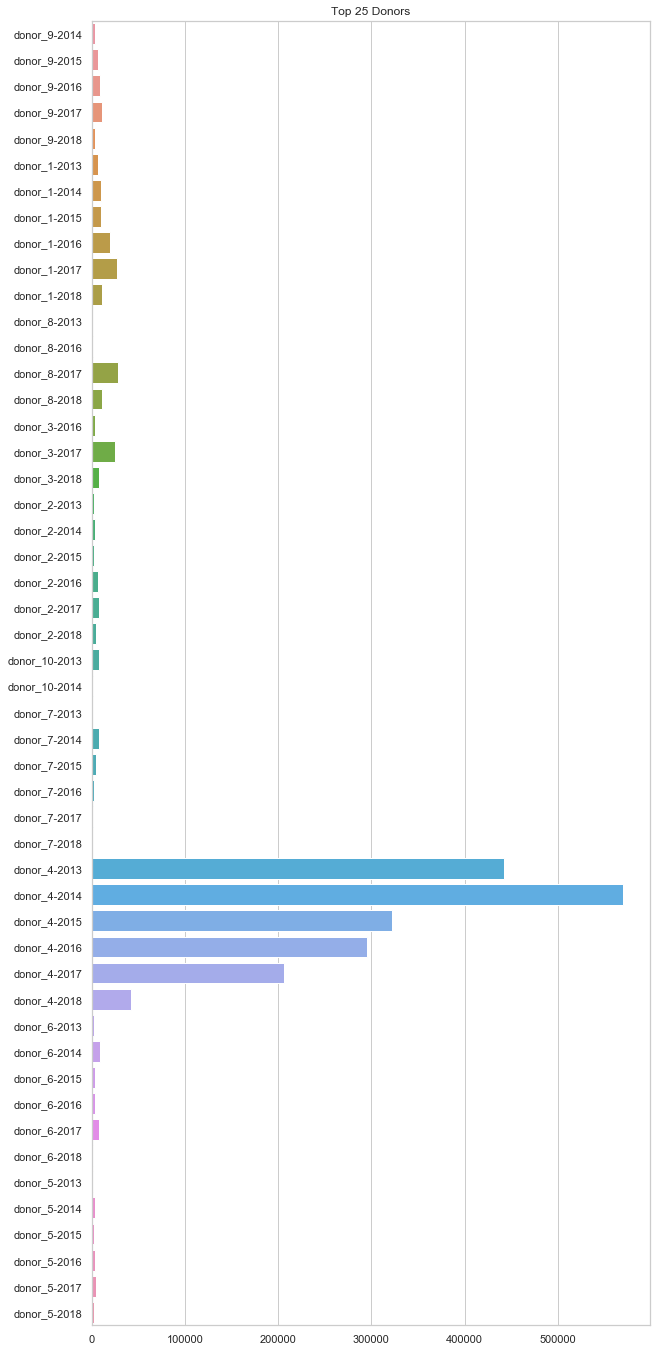

In [260]:
plt.figure(figsize = (10, 24))
sns.set(style="whitegrid")
sns.barplot('amount', 'donor', data = top_10_totals)
plt.xlabel('')
plt.ylabel('')
plt.title('Top 10 Donors');

In [261]:
donor_df.head()

,id,created_at,amount,year,date,month
0,00000ce845c00cbf0686c992fc369df4,2013-12-17 21:47:14,50.00,2013,2013-12-17,12
1,00002783bc5d108510f3f9666c8b1edd,2016-02-02 18:34:27,99.00,2016,2016-02-02,2
2,00002d44003ed46b066607c5455a999a,2016-10-25 20:15:11,10.00,2016,2016-10-25,10
3,00002d44003ed46b066607c5455a999a,2017-01-16 01:11:20,15.51,2017,2017-01-16,1
4,00002d44003ed46b066607c5455a999a,2017-01-16 14:20:10,100.00,2017,2017-01-16,1


In [263]:

donors2013 = donations2013.id.unique()
donors2014 = donations2014.id.unique()
donors2015 = donations2015.id.unique()
donors2016 = donations2016.id.unique()
donors2017 = donations2017.id.unique()


In [270]:
print('Donors retained from 2013 to 2014:', donors2014.shape[0] - len(list(set(donors2013).difference(donors2014))))

Donors retained from 2013 to 2014: 124857


In [271]:
print('Donors retained from 2014 to 2015:', donors2015.shape[0] - len(list(set(donors2014).difference(donors2015))))

Donors retained from 2014 to 2015: 137983


In [272]:
print('Donors retained from 2015 to 2016:', donors2016.shape[0] - len(list(set(donors2015).difference(donors2016))))

Donors retained from 2015 to 2016: 190246


In [273]:
print('Donors retained from 2016 to 2017:', donors2017.shape[0] - len(list(set(donors2016).difference(donors2017))))

Donors retained from 2016 to 2017: 118451
